This example creates a striatal network of 100 dSPN and 100 iSPN neurons. You can also do this using the command line interface, see "snudda -h".

This notebook is started in the Snudda/snudda/examples/notebooks directory, as all paths are given relative to there.

First we create a network-config.json file in networks/simple_example which is a subdirectory to the notebooks directory. The 200 neurons are placed inside a cube, with cell density 80500 neurons/mm3. The neuron morphologies and parameters are taken from the data/cellspecs/dspn and ispn folders.

In [1]:
import os
from snudda.init import SnuddaInit

network_path = os.path.join("networks","simple_example")
config_file = os.path.join(network_path, "network-config.json")
cnc = SnuddaInit(struct_def={}, config_file=config_file, num_population_units=1)
cnc.define_striatum(num_dSPN=100, num_iSPN=100, num_FS=0, num_LTS=0, num_ChIN=0,
                    volume_type="cube", cell_spec_dir="../../data/cellspecs")
cnc.write_json(config_file)


CreateConfig
Seeding with rand_seed=None
Random seed init to 2294636570
Random seed place to 739348410
Random seed detect to 2952441100
Random seed prune to 4070082991
Random seed input to 178698233
Random seed simulate to 689568210
Overriding the number of population units
Using 1 Population Units
No structDef defined, not writing JSON file in init
Using cube for striatum
Creating cube mesh
File: networks/simple_example/mesh/Striatum-cube-mesh-0.00013543930142996346.obj
Centre: [0.00354  0.004645 0.005081]
Side: 0.00013543930142996346
Description: Striatum cube mesh, centre: [0.00354  0.004645 0.005081], side: 0.00013543930142996346
Adding neurons: dSPN from dir ../../data/cellspecs/dspn
Adding neurons: iSPN from dir ../../data/cellspecs/ispn
Writing networks/simple_example/network-config.json


This reads in the network-config.json file and places the dSPN and iSPN neurons within the cube volume, then writes the positions to the network-neuron-positions.hdf5 file.

In [2]:
from snudda.place import SnuddaPlace
position_file = os.path.join(network_path, "network-neuron-positions.hdf5")
sp = SnuddaPlace(config_file=config_file)
sp.read_config()
sp.write_data(position_file)

Using hdf5 version: latest
Parsing configuration file networks/simple_example/network-config.json
Reading random see from config file: 739348410
Using mesh_bin_width 0.00013543930142996346
Cube mesh, switching to serial processing.
Found old cache file (networks/simple_example/mesh/Striatum-cube-mesh-0.00013543930142996346.obj-135-cache.pickle), ignoring.
Running in serial
Voxel mask: 5x5x5
Processing x = 0
Processing x = 1
Processing x = 2
Processing x = 3
Processing x = 4
Fraction of border voxels: 0.0
Saving mesh cache file networks/simple_example/mesh/Striatum-cube-mesh-0.00013543930142996346.obj-135-cache.pickle
Calculation time: 0.01889417413622141 s
Setup voxel list
Setup place neurons
Update padding mask
Regenerating new random pool
Setup done
Inner voxel bin volume: 0.0 mm³
Using dimensions from config file
Adding: 25 dSPN_0
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503/21-6-DE-cor-rep-ax-cache.pickle
Placed 25 in 0.04879149701446295 s
A

In [3]:
from snudda.detect import SnuddaDetect
save_file = os.path.join(network_path, "voxels", "network-putative-synapses.hdf5")

sd = SnuddaDetect(config_file=config_file, position_file=position_file, save_file=save_file)
sd.detect()

Using hdf5 driver version: latest
Memory: 54280531968 free, 67218100224 total
Each hyper voxel has 100 x 100 x 100 voxels
Touch detecting all volumes
Loading from networks/simple_example/network-config.json
Reading random see from config file: 2952441100
Reading prototype for: dSPN_0
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503/21-6-DE-cor-rep-ax-cache.pickle
Reading prototype for: dSPN_1
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20190521/WT-P270-20-15ak-cor-cache.pickle
Reading prototype for: dSPN_2
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150917_c9_d1-mWT-1215MSN03-v20190521/WT-1215MSN03-cor-rep-ax2-cache.pickle
Reading prototype for: dSPN_3
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20190508/WT-0728MSN01-cor-rep-ax-cache.pickle
Reading prototype for: iSPN_0
Found cache file: ../../data/cellspecs/ispn/str-ispn-e150908_c4_D2-m51-5-DE-v20190611/51-5-DE-cor

Create lookup table
detectSynapses: 0 took 0.004797576926648617 s
Create lookup table
detectGapJunctions: 0.0032369187101721764 s
Wrote hyper voxel 36 (0 synapses, 0 gap junctions)
HyperID 36 completed - 0  synapses and 0 gap junctions found (in 5.472884524613619 s)
Processing hyper voxel : 2/64(24 neurons)
Create lookup table
detectSynapses: 0 took 0.00479629822075367 s
Create lookup table
detectGapJunctions: 0.0032326215878129005 s
Wrote hyper voxel 2 (0 synapses, 0 gap junctions)
HyperID 2 completed - 0  synapses and 0 gap junctions found (in 3.429992557503283 s)
Processing hyper voxel : 8/64(16 neurons)
Create lookup table
detectSynapses: 0 took 0.004795287735760212 s
Create lookup table
detectGapJunctions: 0.002882164902985096 s
Wrote hyper voxel 8 (0 synapses, 0 gap junctions)
HyperID 8 completed - 0  synapses and 0 gap junctions found (in 2.8343870136886835 s)
Processing hyper voxel : 38/64(12 neurons)
Create lookup table
detectSynapses: 0 took 0.0046353209763765335 s
Create loo

Prune the synapses in the network based on the connection information in the network-config.json file.

In [4]:
from snudda.prune import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

Random seed: None
Using hdf5 driver sec2, latest version
Opening work history file: networks/simple_example/log/network-detect-worklog.hdf5
Reading random seed from config file: 4070082991
Using default scratch path: networks/simple_example/temp
Skipping FSN to FSN connection
Skipping FSN to dSPN connection
Skipping FSN to iSPN connection
Skipping FSN to LTS connection
Skipping dSPN to ChIN connection
Skipping iSPN to ChIN connection
Skipping LTS to dSPN connection
Skipping LTS to iSPN connection
Skipping LTS to ChIN connection
Checking for merge file networks/simple_example/network-putative-synapses-MERGED.hdf5
Running merge in serial
Doing big_merge_loopup for synapses
[0, 521, 1048576, 0.75]
(0, 521, 20971520, 0.75)
Opening voxel file: networks/simple_example/voxels/network-putative-synapses-21.hdf5
[0, 521, 20971520, 0.75]
Setting max_channel_type to 23 from h_id=21
Opening voxel file: networks/simple_example/voxels/network-putative-synapses-5.hdf5
[0, 521, 20971520, 0.75]
Opening 

Random seed set for neuron 78: 2144704757
Random seed set for neuron 79: 2142819489
Random seed set for neuron 80: 2510428702
Random seed set for neuron 81: 728774485
Random seed set for neuron 82: 95537889
Random seed set for neuron 83: 3661789147
Random seed set for neuron 84: 430983036
Random seed set for neuron 85: 1379272403
Random seed set for neuron 86: 1758766932
Random seed set for neuron 87: 2737792630
Random seed set for neuron 88: 3382313286
Random seed set for neuron 89: 3022879304
Random seed set for neuron 90: 789575231
Random seed set for neuron 91: 152587585
Random seed set for neuron 92: 1242943481
Random seed set for neuron 93: 1555718815
Random seed set for neuron 94: 3678179164
Random seed set for neuron 95: 3376910686
Random seed set for neuron 96: 2220079535
Random seed set for neuron 97: 4239117070
Random seed set for neuron 98: 761651957
Random seed set for neuron 99: 747457556
Random seed set for neuron 100: 3952272030
Random seed set for neuron 101: 328693953

Use matplotlib to plot the network. Note that this can be quite slow for larger networks.

Loading networks/simple_example/network-pruned-synapses.hdf5
Loading config data from HDF5
200 neurons with 24841 synapses and 0 gap junctions
Load done. 0.03757532313466072
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20190508/WT-0728MSN01-cor-rep-ax-cache.pickle
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150917_c9_d1-mWT-1215MSN03-v20190521/WT-1215MSN03-cor-rep-ax2-cache.pickle
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503/21-6-DE-cor-rep-ax-cache.pickle
Found cache file: ../../data/cellspecs/ispn/str-ispn-e150908_c4_D2-m51-5-DE-v20190611/51-5-DE-cor-rep-ax-cache.pickle
Found cache file: ../../data/cellspecs/ispn/str-ispn-e151123_c1_D2-mWT-P270-09-v20190527/WT-P270-09-15ak-cor-cache.pickle
Found cache file: ../../data/cellspecs/ispn/str-ispn-e160118_c10_D2-m46-3-DE-v20190529/46-3-DE-cor-rep-ax-cache.pickle
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20190521/WT

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


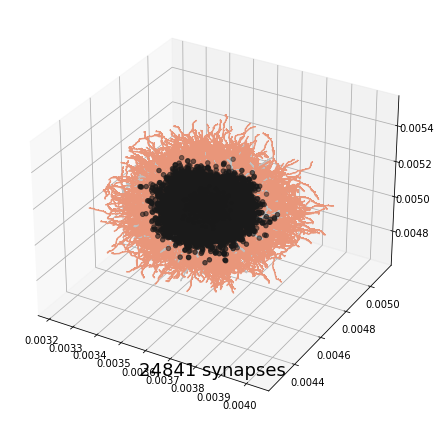

(<module 'matplotlib.pyplot' from '/home/hjorth/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>,
 <Axes3DSubplot:>)

In [7]:
from snudda.plotting.plot_network import PlotNetwork
network_file = os.path.join(network_path, "network-pruned-synapses.hdf5")
pn = PlotNetwork(network_file)
pn.plot()